#  DS PROJECT : Codon Usage : First Variable Selection

**GROUP 1**
1. Suvarna Sangram Aglave (2404343)
2. Sanika Nirmal Sahuji (2400145)
3. Kush Rakesh Mehta (2393362)
4. Keerthana Baithini (2382814)

In [3]:
#imports all essential libraries for data manipulation, visualization, and preprocessing.
import numpy as np
import pandas as pd

import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, KFold
warnings.filterwarnings("ignore")

In [4]:
#read dataset from cleaned csv fie
# setting low_memory=False because it disables the memory optimization and makes pandas read the entire dataset.
df = pd.read_csv('Group_1_Clean_Data.csv', low_memory=False)
df.head()

,Kingdom,DNAtype,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,CUU,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,9,0.0,100217,1995.000000,Epizootic haematopoietic necrosis virus,0.01654,0.01203,0.00050,0.00351,0.01203,...,0.00451,0.01303,0.006101,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000
1,9,0.0,100220,1474.000000,Bohle iridovirus,0.02714,0.01357,0.00068,0.00678,0.00407,...,0.00136,0.01696,0.006101,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000
2,9,0.0,100755,4862.000000,Sweet potato leaf curl virus,0.01974,0.02180,0.01357,0.01543,0.00782,...,0.00596,0.01974,0.006101,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144
3,9,0.0,100880,1915.000000,Northern cereal mosaic virus,0.01775,0.02245,0.01619,0.00992,0.01567,...,0.00366,0.01410,0.016710,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000
4,9,0.0,100887,4051.319086,Soil-borne cereal mosaic virus,0.02816,0.01371,0.00767,0.03679,0.01380,...,0.00604,0.01494,0.017340,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131


### Part: 4.2 - Feature Selection

In [6]:
#split data into input and output
y = df['Kingdom']
numerical_cols = df.select_dtypes(include=np.number).columns
X = df[numerical_cols[1:]]
X.head()

,DNAtype,SpeciesID,Ncodons,UUU,UUC,UUA,UUG,CUU,CUC,CUA,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,0.0,100217,1995.000000,0.01654,0.01203,0.00050,0.00351,0.01203,0.03208,0.00100,...,0.00451,0.01303,0.006101,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000
1,0.0,100220,1474.000000,0.02714,0.01357,0.00068,0.00678,0.00407,0.02849,0.00204,...,0.00136,0.01696,0.006101,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000
2,0.0,100755,4862.000000,0.01974,0.02180,0.01357,0.01543,0.00782,0.01111,0.01028,...,0.00596,0.01974,0.006101,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144
3,0.0,100880,1915.000000,0.01775,0.02245,0.01619,0.00992,0.01567,0.01358,0.00940,...,0.00366,0.01410,0.016710,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000
4,0.0,100887,4051.319086,0.02816,0.01371,0.00767,0.03679,0.01380,0.00548,0.00473,...,0.00604,0.01494,0.017340,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131


Column Names: ['DNAtype' 'SpeciesID' 'Ncodons' 'UUU' 'UUC' 'UUA' 'UUG' 'CUU' 'CUC' 'CUA'
 'CUG' 'AUU' 'AUC' 'AUA' 'AUG' 'GUU' 'GUC' 'GUA' 'GUG' 'GCU' 'GCC' 'GCA'
 'GCG' 'CCU' 'CCC' 'CCA' 'CCG' 'UGG' 'GGU' 'GGC' 'GGA' 'GGG' 'UCU' 'UCC'
 'UCA' 'UCG' 'AGU' 'AGC' 'ACU' 'ACC' 'ACA' 'ACG' 'UAU' 'UAC' 'CAA' 'CAG'
 'AAU' 'AAC' 'UGU' 'UGC' 'CAU' 'CAC' 'AAA' 'AAG' 'CGU' 'CGC' 'CGA' 'CGG'
 'AGA' 'AGG' 'GAU' 'GAC' 'GAA' 'GAG' 'UAA' 'UAG' 'UGA']


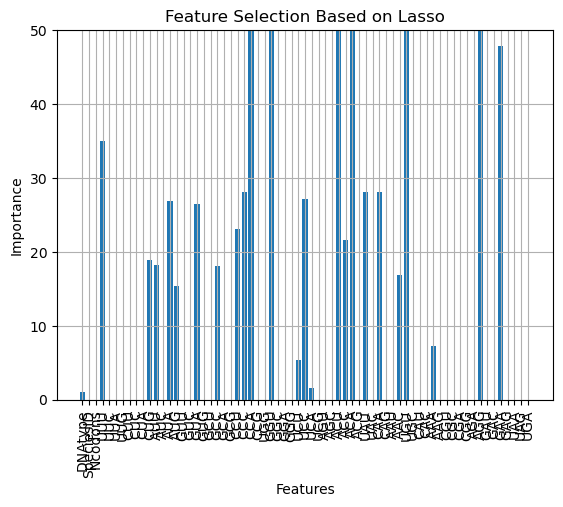

In [7]:
# calling the model with the best parameter
lasso = Lasso(alpha=0.001)
lasso.fit(X, y)

# Using np.abs() to make coefficients positive.  
lasso_coef = np.abs(lasso.coef_)
col_names=X.columns
print("Column Names: {}".format(col_names.values))

# plotting the Column Names and Importance of Columns. 
plt.bar(col_names, lasso_coef)
plt.xticks(rotation=90)
plt.grid()
plt.title("Feature Selection Based on Lasso")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.ylim(0, 50)
plt.show()

In [8]:
# Subsetting the features which has more than 20 importance.
feature_subset=np.array(col_names)[lasso_coef>20]
print("Selected Feature Columns: {}".format(feature_subset))

Selected Feature Columns: ['UUU' 'AUA' 'GUA' 'CCU' 'CCC' 'CCA' 'GGU' 'UCC' 'ACU' 'ACC' 'ACA' 'UAU'
 'CAA' 'UGU' 'AGG' 'GAA']


### Part: 4.3 - Hyperparameter tuning

In [10]:
# parameters to be tested on GridSearchCV
params = {"alpha":np.arange(0.00001, 10, 500)}

# Number of Folds and adding the random state for replication
kf=KFold(n_splits=5,shuffle=True, random_state=42)

# Initializing the Model
lasso_grid = Lasso()

# GridSearchCV with model, params and folds.
lasso_cv=GridSearchCV(lasso_grid, param_grid=params, cv=kf)
lasso_cv.fit(X, y)
print("Best Params {}".format(lasso_cv.best_params_))

Best Params {'alpha': 1e-05}


Column Names: ['DNAtype' 'SpeciesID' 'Ncodons' 'UUU' 'UUC' 'UUA' 'UUG' 'CUU' 'CUC' 'CUA'
 'CUG' 'AUU' 'AUC' 'AUA' 'AUG' 'GUU' 'GUC' 'GUA' 'GUG' 'GCU' 'GCC' 'GCA'
 'GCG' 'CCU' 'CCC' 'CCA' 'CCG' 'UGG' 'GGU' 'GGC' 'GGA' 'GGG' 'UCU' 'UCC'
 'UCA' 'UCG' 'AGU' 'AGC' 'ACU' 'ACC' 'ACA' 'ACG' 'UAU' 'UAC' 'CAA' 'CAG'
 'AAU' 'AAC' 'UGU' 'UGC' 'CAU' 'CAC' 'AAA' 'AAG' 'CGU' 'CGC' 'CGA' 'CGG'
 'AGA' 'AGG' 'GAU' 'GAC' 'GAA' 'GAG' 'UAA' 'UAG' 'UGA']


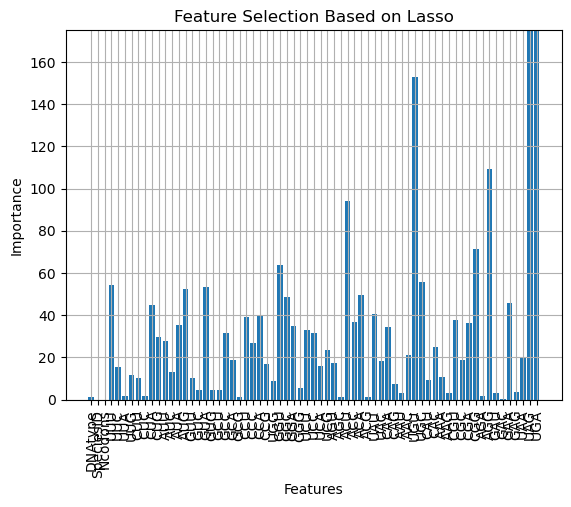

In [11]:
# calling the model with the best parameter
lasso1 = Lasso(alpha=0.00001)
lasso1.fit(X, y)

# Using np.abs() to make coefficients positive.  
lasso1_coef = np.abs(lasso1.coef_)
col_names=X.columns
print("Column Names: {}".format(col_names.values))

# plotting the Column Names and Importance of Columns. 
plt.bar(col_names, lasso1_coef)
plt.xticks(rotation=90)
plt.grid()
plt.title("Feature Selection Based on Lasso")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.ylim(0, 175)
plt.show()

In [12]:
# Subsetting the features which has more than 10 importance.
feature_subset=np.array(col_names)[lasso1_coef>10]
print("Selected Feature Columns: {}".format(feature_subset))

Selected Feature Columns: ['UUU' 'UUC' 'UUG' 'CUU' 'CUA' 'CUG' 'AUU' 'AUC' 'AUA' 'AUG' 'GUU' 'GUA'
 'GCC' 'GCA' 'CCU' 'CCC' 'CCA' 'CCG' 'GGU' 'GGC' 'GGA' 'UCU' 'UCC' 'UCA'
 'UCG' 'AGU' 'ACU' 'ACC' 'ACA' 'UAU' 'UAC' 'CAA' 'AAC' 'UGU' 'UGC' 'CAC'
 'AAA' 'CGU' 'CGC' 'CGA' 'CGG' 'AGG' 'GAA' 'UAA' 'UAG' 'UGA']


In [13]:
# Adding the target to the list of features. 
new_features=np.append('Kingdom', feature_subset)
print("Selected Columns: {}".format(new_features))

Selected Columns: ['Kingdom' 'UUU' 'UUC' 'UUG' 'CUU' 'CUA' 'CUG' 'AUU' 'AUC' 'AUA' 'AUG'
 'GUU' 'GUA' 'GCC' 'GCA' 'CCU' 'CCC' 'CCA' 'CCG' 'GGU' 'GGC' 'GGA' 'UCU'
 'UCC' 'UCA' 'UCG' 'AGU' 'ACU' 'ACC' 'ACA' 'UAU' 'UAC' 'CAA' 'AAC' 'UGU'
 'UGC' 'CAC' 'AAA' 'CGU' 'CGC' 'CGA' 'CGG' 'AGG' 'GAA' 'UAA' 'UAG' 'UGA']


In [14]:
df_new = df[new_features]
print(df_new.head())

   Kingdom      UUU      UUC      UUG      CUU      CUA       CUG      AUU  \
0        9  0.01654  0.01203  0.00351  0.01203  0.00100  0.013201  0.00551   
1        9  0.02714  0.01357  0.00678  0.00407  0.00204  0.013201  0.01153   
2        9  0.01974  0.02180  0.01543  0.00782  0.01028  0.011930  0.02283   
3        9  0.01775  0.02245  0.00992  0.01567  0.00940  0.017230  0.02402   
4        9  0.02816  0.01371  0.03679  0.01380  0.00473  0.020760  0.02716   

       AUC      AUA  ...      AAA      CGU      CGC      CGA      CGG  \
0  0.02005  0.00752  ...  0.01053  0.00401  0.00702  0.00401  0.00451   
1  0.02510  0.00882  ...  0.00543  0.00136  0.00678  0.00136  0.00136   
2  0.01604  0.01316  ...  0.02077  0.00864  0.00596  0.00926  0.00596   
3  0.02245  0.02507  ...  0.03133  0.00627  0.00261  0.00261  0.00366   
4  0.00867  0.01310  ...  0.03408  0.00950  0.00429  0.00578  0.00604   

        AGG      GAA      UAA      UAG      UGA  
0  0.006101  0.01203  0.00251  0.00050  0.

In [15]:
#exporting first level feature selected data from df to a CSV file
df_new.to_csv('Group_1_First_Var_Selection_Data.csv', index=False)

### Conclusion

Used KFold cross validation using GridSearch for best param value of learning rate alpha for lasso regression
model and used that to perform feature selecPon. Plo6ed bar chart to check feature importance and based
on lasso coeﬃcients selected features with high importance and reduced feature set from 64 to 46.